In [86]:
pip install astropy

Note: you may need to restart the kernel to use updated packages.


In [87]:
import astropy as at

# calculating the mean stack of a set of FITS images.

In [88]:
from astropy.io import fits
import matplotlib.pyplot as plt
i1=fits.open("image0.fits")
i2=fits.open("image1.fits")
i3=fits.open("image2.fits")
i4=fits.open("image3.fits")
i2.info()

Filename: image1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


In [89]:
data1=i1[0].data
data2=i2[0].data
data3=i3[0].data
data4=i4[0].data
print(data1.shape)

(200, 200)


In [90]:
import numpy as np
def load_fits(filename):
    h=fits.open(filename)
    data=h[0].data
    arg_max=np.argmax(data)
    max_pos=np.unravel_index(arg_max,data.shape)
    return(max_pos)

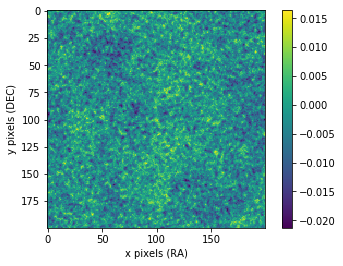

In [91]:
plt.imshow(data4,cmap=plt.cm.viridis)
plt.xlabel("x pixels (RA)")
plt.ylabel("y pixels (DEC)")
plt.colorbar()
plt.show()

In [92]:
def mean_stack(files):
    file=fits.open(files[0])
    data=file[0].data
    file.close()
    n=len(files)
    if n>1:
        for i in range(1,n):
            file=fits.open(files[i])
            data+=file[0].data
            file.close
    return(data/n)

In [122]:
data=mean_stack(['image0.fits', 'image1.fits', 'image2.fits','image3.fits'])

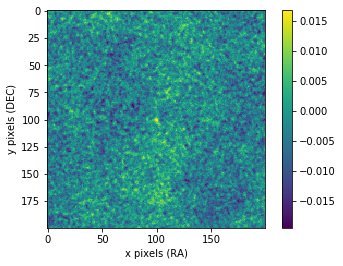

In [94]:
plt.imshow(data)
plt.xlabel("x pixels (RA)")
plt.ylabel("y pixels (DEC)")
plt.colorbar()
plt.show()

# calculating median stack of a set of FITS images

In [95]:
import time
start=time.perf_counter()
from statistics import median
def median_stack(files):
    d=[[]]
    data_final=[[]]
    for i in files:
        file=fits.open(i)
        data=file[0].data
        for i1 in range(len(data)):
            for j1 in range(len(data[0])):
                data_final[i1][j1].append(data[i1][j1])
    for i1 in range(len(data)):
        for j1 in range(len(data[0])):
            d[i1][j1]=median(data_final[i1][j1])
    return(d)
end=time.perf_counter()-start

In [96]:
data=mean_stack(['image0.fits', 'image1.fits', 'image2.fits','image3.fits'])

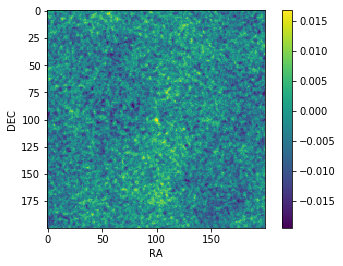

In [97]:
plt.imshow(data)
plt.colorbar()
plt.xlabel("RA")
plt.ylabel("DEC")
plt.show()

# finding time taken for  codes to run

In [98]:
import time
start=time.perf_counter()
end=time.perf_counter()-start

In [99]:
end

6.639998173341155e-05

In [100]:
time_stat(np.mean,10*5,1000)

0.01938260000315495

In [101]:
import numpy
def time_stat(f,size,trails):
    s=time.perf_counter()
    for i in range(trails):
        data=np.random.rand(size)
        x=f(data)
    f=time.perf_counter()-s
    return(f)
    

# finding memory coonsumed by codes to run

In [102]:
import sys
import numpy as np
a=np.array([])
b=np.array([1,2])
c=np.array([[],[]]) 

In [103]:
sys.getsizeof(b)

104

In [104]:
b.nbytes

8

In [105]:
b.size*b.itemsize

8

# Binapprox methods

In [111]:
import statistics as stat
import numpy as np
def median_bins(data,b):
    mean=stat.mean(data)
    std_dev=stat.stdev(data)
    minval=mean-std_dev
    maxval=mean+std_dev
    # Initializing bins
    bin_width=(std_dev*2)/b
    bins=np.zeros(b)
    left_bin=0
    # Bin values
    for value in data:
        if value < minval:
            left_bin += 1
        elif value < maxval:
            bin = int((value - minval)/bin_width)
            bins[bin]+= 1
    return(mean,std_dev,left_bin,bins)

In [117]:
def median_approx(data,b):
    mean,std,left_bin,bins=median_bins(data,b)
    N=len(data)
    mid=(N+1)/2
    count=left_bin
    for b,bincount in enumerate(bins):
        count+=bincount
        if count>=mid:
            break
    width=(2*std)/b
    median=mean-std + width*(b+0.5)
    return(median)

In [118]:
median_bins([1, 1, 3, 2, 2, 6], 3)

(2.5, 1.8708286933869707, 0, array([2., 3., 0.]))

In [119]:
median_approx([1,5,7,7,7,3,6,1,1],4)

8.314898608158448

In [120]:
median_approx([0, 1], 5)

1.3838834764831844

In [121]:
median_approx([1,1,3,2,2,6], 3)

6.241657386773942

In [123]:
fits1=['image0.fits', 'image1.fits', 'image2.fits','image3.fits']